In [1]:
import pandas as pd
import numpy as np
import gensim
from gensim import models
from gensim.models import Word2Vec, KeyedVectors
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
import matplotlib.pyplot as pyplot
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
from gensim.models import KeyedVectors

In [2]:
df = pd.read_csv("preprocessed_data.csv")
df.head()

,filepath,age,gender,mmse,pause1,pause2,pause3,count_unintelligible,count_trailing,count_repetitions,category,data
0,138-1.cha,68.0,female,28.0,0,0,1,0,1,3,Control,there's a cookie jar on the shelf . and the ...
1,631-0.cha,74.0,male,29.0,0,0,0,0,0,0,Control,the kids are in the cookies . the stool is fa...
2,182-3.cha,NaN,male,NaN,0,0,0,0,1,0,Control,well Johnny's falling off the stool . the boy...
3,121-0.cha,70.0,female,30.0,0,1,0,0,0,0,Control,the boy is taking a cookie outof the cookie ...
4,142-3.cha,61.0,female,30.0,0,0,0,0,0,0,Control,well the water's running over on the floor ....


In [3]:
df_sub = df.loc[df.category.isin([ "Control", "ProbableAD"])]
df_sub

,filepath,age,gender,mmse,pause1,pause2,pause3,count_unintelligible,count_trailing,count_repetitions,category,data
0,138-1.cha,68.0,female,28.0,0,0,1,0,1,3,Control,there's a cookie jar on the shelf . and the ...
1,631-0.cha,74.0,male,29.0,0,0,0,0,0,0,Control,the kids are in the cookies . the stool is fa...
2,182-3.cha,NaN,male,NaN,0,0,0,0,1,0,Control,well Johnny's falling off the stool . the boy...
3,121-0.cha,70.0,female,30.0,0,1,0,0,0,0,Control,the boy is taking a cookie outof the cookie ...
4,142-3.cha,61.0,female,30.0,0,0,0,0,0,0,Control,well the water's running over on the floor ....
5,086-2.cha,NaN,female,NaN,1,1,0,0,0,1,Control,well the boy has climbed up on the stool to g...
6,267-2.cha,54.0,female,30.0,2,0,0,0,0,1,Control,mother is drying the dishes and looking out t...
7,118-4.cha,NaN,female,NaN,1,0,0,0,0,0,Control,well the water's running over outta out the s...
8,166-2.cha,NaN,male,NaN,1,0,0,0,0,0,Control,all of the things that I see going on ? well ...
9,105-1.cha,57.0,female,27.0,0,0,0,0,0,0,Control,well the mother is drying the dishes . the s...


In [4]:
import re


REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    
    return reviews

reviews_train_clean = preprocess_reviews(df_sub["data"].tolist())

In [5]:
#print(reviews_train_clean)
text_split = [str.split(s) for s in reviews_train_clean]
print(text_split)

[['theres', 'a', 'cookie', 'jar', 'on', 'the', 'shelf', 'and', 'the', 'little', 'boys', 'up', 'on', 'a', 'stool', 'and', 'the', 'stool', 'is', 'about', 'to', 'fall', 'hes', 'about', 'to', 'fall', 'the', 'stools', 'about', 'to', 'turn', 'over', 'little', 'girl', 'in', 'the', 'pictures', 'reaching', 'for', 'the', 'cookie', 'mother', 'is', 'washing', 'dishes', 'the', 'waters', 'running', 'and', 'running', 'over', 'onto', 'the', 'floor', 'she', 'she', 'has', 'a', 'plate', 'in', 'her', 'hand', 'and', 'a', 'towel', 'shes', 'drying', 'a', 'plate', 'two', 'cups', 'are', 'sitting', 'on', 'a', 'counter', 'and', 'also', 'a', 'plate', 'you', 'can', 'see', 'out', 'through', 'the', 'kitchen', 'window', 'to', 'another', 'part', 'of', 'the', 'house', 'and', 'a', 'a', 'walkway', 'away', 'from', 'the', 'house', 'you', 'can', 'see', 'a', 'window', 'across', 'in', 'the', 'other', 'part', 'of', 'the', 'house', 'the', 'roof', 'with', 'a', 'tree', 'that', 'there', 'are', 'there', 'are', 'curtains', 'on', 'th

In [6]:
# Develop Word2Vec Embedding
sentences = text_split
model = Word2Vec(sentences)

In [7]:
words = list(model.wv.vocab)
print(words)

['theres', 'a', 'cookie', 'jar', 'on', 'the', 'shelf', 'and', 'little', 'boys', 'up', 'stool', 'is', 'about', 'to', 'fall', 'hes', 'stools', 'turn', 'over', 'girl', 'in', 'reaching', 'for', 'mother', 'washing', 'dishes', 'waters', 'running', 'onto', 'floor', 'she', 'has', 'plate', 'her', 'hand', 'towel', 'shes', 'drying', 'two', 'cups', 'are', 'sitting', 'counter', 'also', 'you', 'can', 'see', 'out', 'through', 'kitchen', 'window', 'another', 'part', 'of', 'house', 'walkway', 'away', 'from', 'other', 'with', 'tree', 'that', 'there', 'curtains', 'windows', 'i', 'think', 'thats', 'did', 'it', 'all', 'yeah', 'kids', 'cookies', 'falling', 'mothers', 'spilling', 'water', 'wind', 'might', 'be', 'blowing', 'cant', 'tell', 'anything', 'going', 'outside', 'or', 'not', 'guess', 'very', 'many', 'well', 'off', 'after', 'trying', 'steal', 'outof', 'gonna', 'give', 'them', 'his', 'sister', 'open', 'theyre', 'girls', 'whispering', 'quiet', 'boy', 'taking', 'he', 'one', 'left', 'reach', 'down', 'finge

In [8]:
print(model['cookies'])

[ 0.4633169  -0.34865123  0.13664927  0.12242831 -0.14361672 -0.03327265
 -0.00356575 -0.72438097  0.01680329 -0.21382028 -0.33161247  0.35809085
  0.05209594  0.2616012  -0.3023384   0.49613395  0.07386056  0.1029987
 -0.27137592  0.13556615  0.45724183 -0.02718266  0.21073796 -0.11191688
 -0.30002725  0.34297633 -0.08516497  0.49661925  0.2925173  -0.20622416
 -0.138711    0.0873519  -0.03525829 -0.14223467 -0.48129785 -0.14803752
  0.21824299  0.3574661   0.2681178   0.08937322 -0.36635914 -0.0621273
 -0.04807959 -0.6481063   0.1515694  -0.2626458  -0.18005244  0.04939479
  0.20449328  0.36361593  0.01528568  0.28198925  0.27158043  0.09100609
  0.3404273  -0.25129983  0.3151828  -0.4461328  -0.5155435   0.06273441
 -0.01136567  0.0743605  -0.08776144 -0.17849414 -0.50476116 -0.24738847
  0.09203087 -0.4987346  -0.12411039  0.01014847  0.22925788 -0.52290004
 -0.30537072  0.3904054  -0.12385086 -0.00765641  0.04746569  0.08789917
 -0.25512472  0.02965025  0.49509528  0.3094059   0.4

/Users/YangyangLi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [9]:
model.wv.save_word2vec_format('model.bin')

In [10]:
model.wv.save_word2vec_format('model.txt', binary=False)

In [11]:
model = Word2Vec.load('model.bin')

UnpicklingError: invalid load key, '5'.

In [12]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)
['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
[ 1.3147346e-03 -1.2902763e-03 -1.5608857e-04 -4.4874153e-03
  5.6741043e-04 -1.5331245e-03  4.7029993e-03  4.7731451e-03
 -1.9931690e-04 -3.2073073e-03 -3.9971080e-03 -1.3210521e-03
  2.7435469e-03 -2.9084203e-03  2.8358054e-04  3.2329015e-03
 -3.9350237e-03 -1.0633190e-03  8.8624039e-04 -2.4446670e-03
 -3.8143224e-04 -3.9236997e-03 -3.0622233e-03  2.3200794e-03
  1.8364035e-03 -2.9857093e-03 -2.9656701e-03  1.7775306e-05
 -2.9544262e-04 -1.7123539e-03  4.2220494e-03  1.4678267e-03
 -3.4543592e-03 -4.3912404e-03  2.5232341e-03  3.7788853e-04
  2.4003193e-03 -1.7473570e-04  2.0329906e-03 -3.5935824e-03
  2.7295363e-03  3.1528962e-03  5.6309043e-04  4.8740697e-03
 -2.3507325e-03  3.1274906e-03  8.2722698e-05 -1.1662423e-03
 -4.1240407e-03 -2.4323602e-04  3.3692806e-03 -3.5814513e-03
  1.2392577e-03  4.1090748e-03 -2.6821236e-0

/Users/YangyangLi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


In [15]:
# Visualize Word Embedding
X = model[model.wv.vocab]

/Users/YangyangLi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [19]:
# Plot Word Vectors Using PCA
pca = PCA(n_components=2)
result = pca.fit_transform(X)

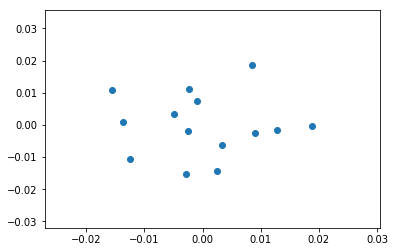

In [22]:
pyplot.scatter(result[:, 0], result[:, 1])

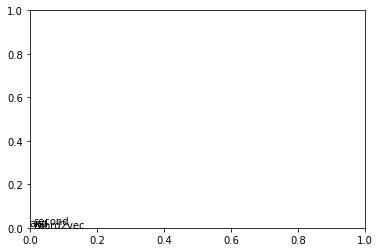

In [23]:
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

/Users/YangyangLi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


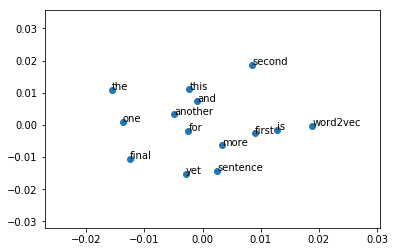

In [25]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
            ['this', 'is', 'the', 'second', 'sentence'],
            ['yet', 'another', 'sentence'],
            ['one', 'more', 'sentence'],
            ['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [26]:
# Load Google’s Word2Vec Embedding
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

FileNotFoundError: [Errno 2] No such file or directory: 'GoogleNews-vectors-negative300.bin'

In [ ]:
queen = (king - man) + woman

In [ ]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

In [ ]:
# load the google word2vec model
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

In [ ]:
[('queen', 0.7118192315101624)]